# Preprocessing and Feature Analysis

In [1]:
import tensorflow as tf
from tensorflow.keras import regularizers
import pandas as pd
import numpy as np
from tensorflow.keras import layers

In [2]:
file_path = "/Users/kiyoshitakeuchi/Desktop/Machine Learning/house-prices-advanced-regression-techniques/"
file_name = "train.csv"
test_file_name = "test.csv"

In [3]:
train_set = pd.read_csv(file_path + file_name)
train_set.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Change the label depending on the model.

In [4]:
label = "SalePrice"
test_set = pd.read_csv(file_path + test_file_name)
test_set.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


Some of the inputs that are numeric are categorical. I try to automate the finding of the categorical features this way. The list should not be too unmanageable, and from there one can remove the non-categorical elements.

In [5]:
categorical = []

for name, column in train_set.items():
        dtype = column.dtype
        if dtype == "int64" and len(np.unique(train_set[name])) < 20:
            categorical.append(name)
print(categorical)

ncf_dict = {name:"str" for name in categorical}
test_set = test_set.astype(ncf_dict)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']


In [6]:
items_to_remove = ['YrSold', 'Fireplaces', 'GarageCars', 'TotRmsAbvGrd']

for element in items_to_remove:
    categorical.remove(element)
    
print(categorical)

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'PoolArea', 'MoSold']


We can remove the rows that have NaNs if there are many examples. If the input is categorical, we should replace a NaN with a ? instead of the mean/median.

In [7]:
def remove_nan(data_frame): 
    temporary_frame = data_frame.copy().drop(categorical, axis=1)
    mean = temporary_frame.select_dtypes(include = 'number').mean()
    mean = mean.to_dict()
    data_frame.fillna(value=mean, inplace=True)
    data_frame.fillna(value="?", inplace=True)
    return

remove_nan(test_set)
remove_nan(train_set)

In [8]:
train_set.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,?,Reg,Lvl,AllPub,...,0,?,?,?,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,?,Reg,Lvl,AllPub,...,0,?,?,?,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,?,IR1,Lvl,AllPub,...,0,?,?,?,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,?,IR1,Lvl,AllPub,...,0,?,?,?,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,?,IR1,Lvl,AllPub,...,0,?,?,?,0,12,2008,WD,Normal,250000


In [9]:
features = train_set.copy().astype(ncf_dict)
labels = features.pop(label)

In [10]:
features_dict = {name: np.array(value) 
                         for name, value in features.items()}

In [11]:
def preprocess_data(data_frame):    
    inputs = {}

    for name, column in data_frame.items():
        dtype = column.dtype
        if dtype == object:
            dtype = tf.string
        else:
            dtype = tf.float32
        inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)
        
    numeric_inputs = {name:input for name, input in inputs.items() 
                      if input.dtype==tf.float32}


    x = layers.Concatenate()(list(numeric_inputs.values()))
    norm = layers.Normalization()
    norm.adapt(np.array(train_set[numeric_inputs.keys()]))
    all_numeric_inputs = norm(x)

    preprocessed_inputs = [all_numeric_inputs]
    
    for name, input in inputs.items():
        if input.dtype == tf.float32 and name not in categorical:
            continue 
            
        if name in categorical:
            data_frame[name] = data_frame[name].astype(str)
        
        lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(data_frame[name]))
        
            
        one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())
        x = lookup(input)
        x = one_hot(x)
        preprocessed_inputs.append(x)
    
    preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

    preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)
    
    return [inputs, preprocessing]

# Model

In [12]:
from matplotlib import pyplot as plt
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [13]:
import pathlib
import shutil
import tempfile

logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [14]:
N_VALIDATION = int(1e3)
N_TRAIN = len(train_set)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 100
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

In [15]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=STEPS_PER_EPOCH*1000,
    decay_rate=1,
    staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

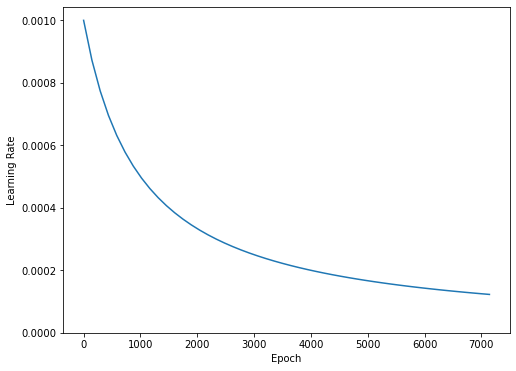

In [16]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

In [17]:
def get_callbacks(name):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=200),
        tf.keras.callbacks.TensorBoard(logdir/name),
    ]

In [29]:
def compile_and_fit(model, name, optimizer=None, max_epochs=1000):
    if optimizer is None:
        optimizer = get_optimizer()
    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=[
                  tf.keras.losses.MeanAbsoluteError(),
                  'accuracy'])

    model.summary()

    history = model.fit(
        x=features_dict, 
        y=labels, 
        validation_split = 0.1,
        steps_per_epoch = STEPS_PER_EPOCH,
        epochs=max_epochs,
        callbacks=get_callbacks(name),
        verbose=0)
    return history

In [30]:
def working_model(data_frame):
    body = tf.keras.Sequential([
    layers.Dense(512 * 2 ** 0, kernel_regularizer=regularizers.l1(0.001), activation='ReLU'),
    layers.Dropout(0.5),
    layers.Dense(512 * 2 ** 0, kernel_regularizer=regularizers.l1(0.001), activation='ReLU'),
    layers.Dropout(0.5),
    layers.Dense(1)
    ])
    
    inputs, preprocessing_head = preprocess_data(data_frame)
    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)
    return model

In [31]:
def working_model_2(data_frame):
    body = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l1(0.0001), activation='LeakyReLU'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l1(0.0001), activation='LeakyReLU'),
    layers.Dropout(0.5),  
    layers.Dense(512, kernel_regularizer=regularizers.l1(0.0001), activation='LeakyReLU'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l1(0.0001), activation='LeakyReLU'),
    layers.Dropout(0.5),  
    layers.Dense(1)
    ])
    
    inputs, preprocessing_head = preprocess_data(data_frame)
    preprocessed_inputs = preprocessing_head(inputs)
    result = body(preprocessed_inputs)
    model = tf.keras.Model(inputs, result)
    return model

In [32]:
model_1 = working_model(features)

In [33]:
model_2 = working_model_2(features)

In [34]:
size_histories = {}

In [35]:
size_histories['Model_1'] = compile_and_fit(model_1, 'sizes/model_1')

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 1stFlrSF (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 2ndFlrSF (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 3SsnPorch (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Alley (InputLayer)             [(None, 1)]          0           []                               
                                                                                            

 Heating (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 HeatingQC (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 HouseStyle (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Id (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 KitchenAbvGr (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 KitchenQu

                                                                  'Alley[0][0]',                  
                                                                  'BedroomAbvGr[0][0]',           
                                                                  'BldgType[0][0]',               
                                                                  'BsmtCond[0][0]',               
                                                                  'BsmtExposure[0][0]',           
                                                                  'BsmtFinSF1[0][0]',             
                                                                  'BsmtFinSF2[0][0]',             
                                                                  'BsmtFinType1[0][0]',           
                                                                  'BsmtFinType2[0][0]',           
                                                                  'BsmtFullBath[0][0]',           
          

....................................................................................................
Epoch: 100, accuracy:0.0000,  loss:18103.4844,  mean_absolute_error:18018.9121,  val_accuracy:0.0000,  val_loss:14237.4258,  val_mean_absolute_error:13980.3311,  
....................................................................................................
Epoch: 200, accuracy:0.0000,  loss:16963.4961,  mean_absolute_error:16866.3770,  val_accuracy:0.0000,  val_loss:13682.4609,  val_mean_absolute_error:13504.2627,  
....................................................................................................
Epoch: 300, accuracy:0.0000,  loss:16006.3779,  mean_absolute_error:15902.5879,  val_accuracy:0.0000,  val_loss:13747.7920,  val_mean_absolute_error:13610.1533,  
....................................................................................................
Epoch: 400, accuracy:0.0000,  loss:16141.8193,  mean_absolute_error:16044.4277,  val_accuracy:0.0000,  val_

In [36]:
size_histories['Model_2'] = compile_and_fit(model_2, 'sizes/model_2')

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 1stFlrSF (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 2ndFlrSF (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 3SsnPorch (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 Alley (InputLayer)             [(None, 1)]          0           []                               
                                                                                            

 Heating (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 HeatingQC (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 HouseStyle (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Id (InputLayer)                [(None, 1)]          0           []                               
                                                                                                  
 KitchenAbvGr (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 KitchenQu

                                                                  'Alley[0][0]',                  
                                                                  'BedroomAbvGr[0][0]',           
                                                                  'BldgType[0][0]',               
                                                                  'BsmtCond[0][0]',               
                                                                  'BsmtExposure[0][0]',           
                                                                  'BsmtFinSF1[0][0]',             
                                                                  'BsmtFinSF2[0][0]',             
                                                                  'BsmtFinType1[0][0]',           
                                                                  'BsmtFinType2[0][0]',           
                                                                  'BsmtFullBath[0][0]',           
          


Epoch: 0, accuracy:0.0000,  loss:181240.7188,  mean_absolute_error:181234.2344,  val_accuracy:0.0000,  val_loss:174044.0000,  val_mean_absolute_error:173838.2188,  
....................................................................................................
Epoch: 100, accuracy:0.0000,  loss:18863.5820,  mean_absolute_error:18855.1816,  val_accuracy:0.0000,  val_loss:14135.4346,  val_mean_absolute_error:14141.0986,  
....................................................................................................
Epoch: 200, accuracy:0.0000,  loss:18553.7656,  mean_absolute_error:18554.2012,  val_accuracy:0.0000,  val_loss:13753.0459,  val_mean_absolute_error:13827.2598,  
....................................................................................................
Epoch: 300, accuracy:0.0000,  loss:17653.6582,  mean_absolute_error:17644.4082,  val_accuracy:0.0000,  val_loss:15461.9639,  val_mean_absolute_error:15610.4658,  
................

(0.0, 200000.0)

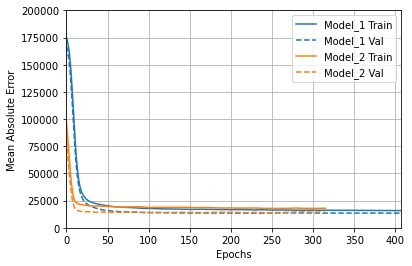

In [37]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0, 200000])

In [27]:
test_features_dict = {name: np.array(value) 
                         for name, value in test_set.copy().items()}
array = model_1.predict(test_features_dict)

In [28]:
import csv

with open('regression_solution_12.csv', 'w', newline='') as file:
    fieldnames = ['Id', 'SalePrice']
    writer = csv.DictWriter(file, fieldnames=fieldnames)

    writer.writeheader()
    n = 1461
    for element in array:
        writer.writerow({'Id': n, 'SalePrice': element[0]})
        n += 1